In [4]:
import pandas as pd
import numpy as np
# Download latest version

penguin = pd.read_csv("/penguin/penguins_size.csv")
penguinarray = penguin.to_numpy()

x = penguinarray[:,:-1]
y = penguinarray[:,-1]

#Transformed species into numbers
#Adelie = 0
#Gentoo = 1
#Chinstrap = 2
xx = np.zeros_like(x)
xx[:,1:] = x[:,1:]
for i in range(len(penguinarray)):
    if(penguinarray[i][0] == "Gentoo"):
        xx[i][0] = 1
    elif(penguinarray[i][0] == "Chinstrap"):
        xx[i][0] = 2

#Transformed sex into numbers
#Female = 0
#Male = 1
yy = (y == 'male').astype(int)

male = (y == 'male')
maleX = xx[male]
maleY = yy[male]
female = (y == 'female')
femaleX = xx[female]
femaleY = yy[female]
print("Number of male penguins: ", len(maleX), "\nNumber of female penguins: ", len(femaleX))

Number of male penguins:  168 
Number of female penguins:  165


The original dataset was meant to be used to classify species, so let's see what the features look like across species.

array([[<Axes: xlabel='bill_length_mm', ylabel='bill_length_mm'>,
        <Axes: xlabel='bill_depth_mm', ylabel='bill_length_mm'>,
        <Axes: xlabel='flipper_length_mm', ylabel='bill_length_mm'>,
        <Axes: xlabel='body_mass_g', ylabel='bill_length_mm'>],
       [<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>,
        <Axes: xlabel='bill_depth_mm', ylabel='bill_depth_mm'>,
        <Axes: xlabel='flipper_length_mm', ylabel='bill_depth_mm'>,
        <Axes: xlabel='body_mass_g', ylabel='bill_depth_mm'>],
       [<Axes: xlabel='bill_length_mm', ylabel='flipper_length_mm'>,
        <Axes: xlabel='bill_depth_mm', ylabel='flipper_length_mm'>,
        <Axes: xlabel='flipper_length_mm', ylabel='flipper_length_mm'>,
        <Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>],
       [<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>,
        <Axes: xlabel='bill_depth_mm', ylabel='body_mass_g'>,
        <Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>,
        <

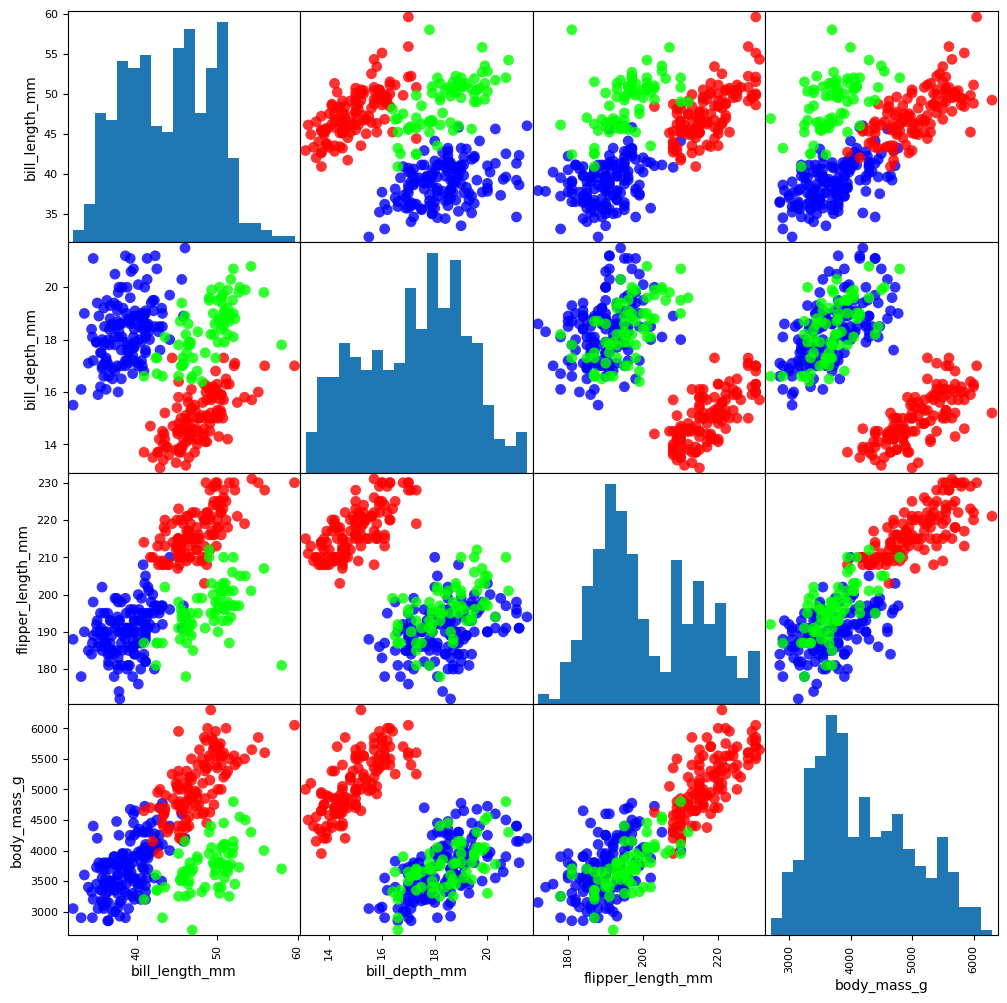

In [6]:
#Plotting significance of different features for determining species
import matplotlib as mpl
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(penguin, c=xx[:,0], figsize=(12, 12),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8, cmap=plt.get_cmap('brg'))

Now, let's see how the relationships between features look when we color it according to sex instead. (Male penguins are green, and female penguins are blue.)

array([[<Axes: xlabel='bill_length_mm', ylabel='bill_length_mm'>,
        <Axes: xlabel='bill_depth_mm', ylabel='bill_length_mm'>,
        <Axes: xlabel='flipper_length_mm', ylabel='bill_length_mm'>,
        <Axes: xlabel='body_mass_g', ylabel='bill_length_mm'>],
       [<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>,
        <Axes: xlabel='bill_depth_mm', ylabel='bill_depth_mm'>,
        <Axes: xlabel='flipper_length_mm', ylabel='bill_depth_mm'>,
        <Axes: xlabel='body_mass_g', ylabel='bill_depth_mm'>],
       [<Axes: xlabel='bill_length_mm', ylabel='flipper_length_mm'>,
        <Axes: xlabel='bill_depth_mm', ylabel='flipper_length_mm'>,
        <Axes: xlabel='flipper_length_mm', ylabel='flipper_length_mm'>,
        <Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>],
       [<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>,
        <Axes: xlabel='bill_depth_mm', ylabel='body_mass_g'>,
        <Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>,
        <

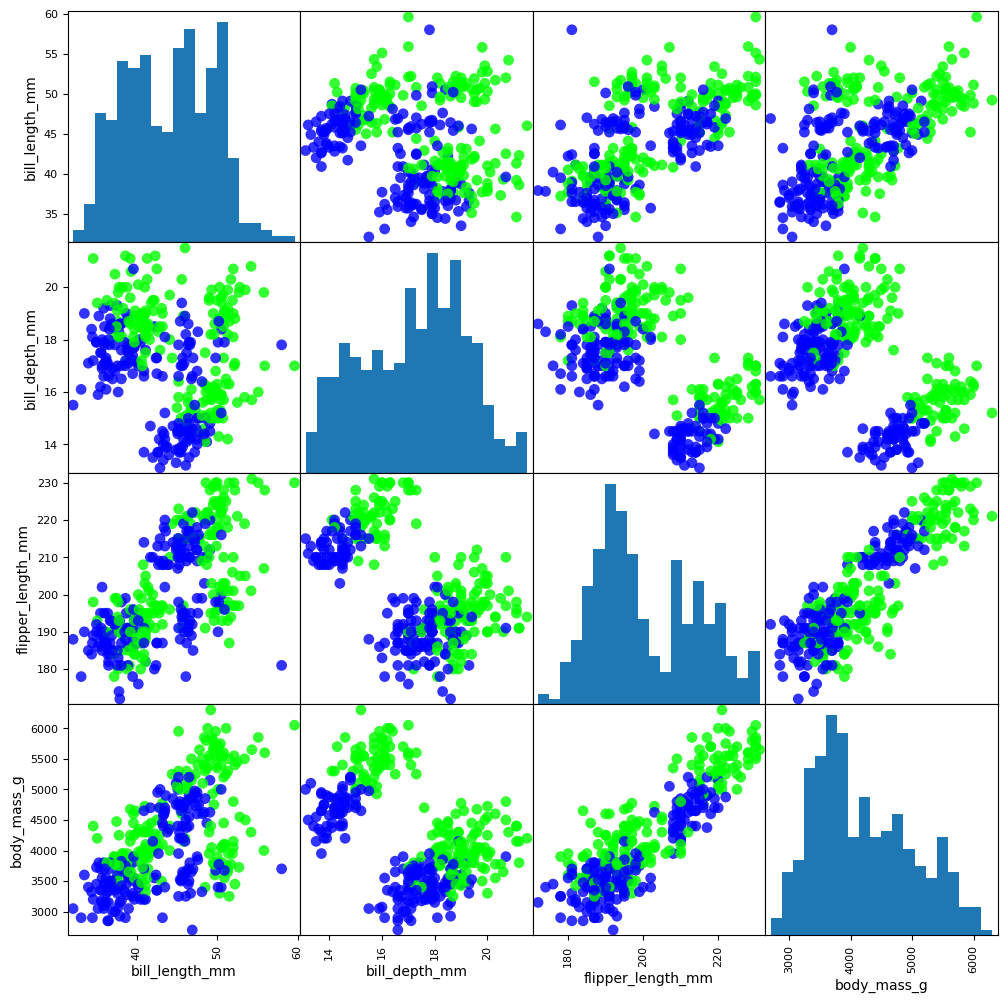

In [7]:
#Now plotting significance based on sex
pd.plotting.scatter_matrix(penguin, c=yy, figsize=(12, 12),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8, cmap=plt.get_cmap('brg'))

Even in places where there's a clear divide between species, it seems that male penguins tend to have higher values of all features.

First, we're going to test the simple KNN on our dataset, setting k to 10.

In [18]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(
    xx, yy)

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.77


How well does KNN perform with a different number of neighbors?

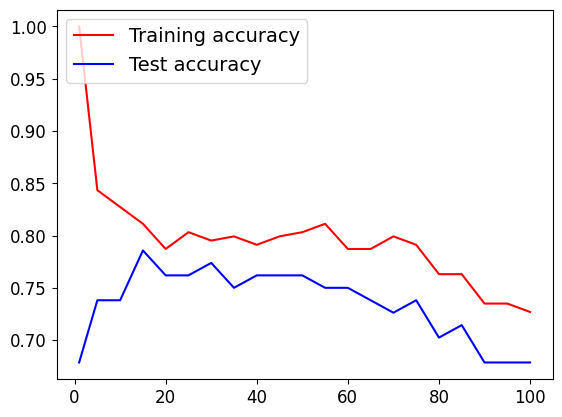

In [40]:
#Testing accuracy across different C values
X_train, X_test, y_train, y_test = train_test_split(xx, yy)
k_vals = [1,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
knns = [KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train) for k in k_vals]
train_accs = np.array([lg.score(X_train, y_train) for lg in knns])
test_accs = np.array([lg.score(X_test, y_test) for lg in knns])
plt.plot(k_vals, train_accs, "r-", label="Training accuracy")
plt.plot(k_vals, test_accs, "b-", label="Test accuracy")
plt.legend(loc="upper left", fontsize=14)

KNN never seems to do better than 80%. It might perform better if it is only given the data of a single species, but we want a model that works well on the entire dataset, without needing to divide it.

Now, let's try logistic regression.

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import MinMaxScaler


In [9]:
# Logitic regression
log_reg = LogisticRegression(solver="liblinear")
log_reg.fit(xx, yy)

LogisticRegression(solver='liblinear')

Here's how logistic regression classifies based on a single feature. We chose to display it based on body mass, since that feature seemed to have the clearest divide, but you can change f to be any of the other features. Species is the only one that does not give workable results.

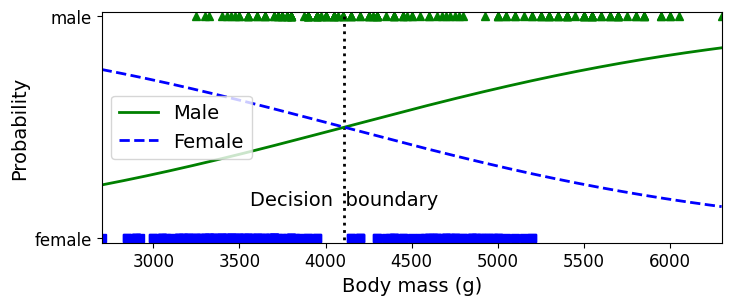

In [41]:
# 0: species
# 1: bill length (mm)
# 2: bill depth (mm)
# 3: flipper length (mm)
# 4: body mass (g)
f = 4

X = xx[:,f].reshape((len(xx), 1))  

x_min = min(X[:,0])
x_max = max(X[:,0])

log_reg = LogisticRegression(solver="liblinear")
log_reg.fit(X, yy)

X_new = np.linspace(x_min, x_max, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y=='female'], y[y=='female'], "bs")
plt.plot(X[y=='male'], y[y=='male'], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Male")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Female")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.xlabel("Body mass (g)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([x_min, x_max, -0.02, 1.02])
plt.show()

Now, let's try logistic regression on all of the features.

In [60]:
X_train, X_test, y_train, y_test = train_test_split(xx, yy)
#Using default C value of 1
log_reg = LogisticRegression(solver="liblinear")
log_reg.fit(X_train, y_train)

y_train_classify = log_reg.predict(X_train)
y_test_classify = log_reg.predict(X_test)

true_male = np.sum(np.logical_and(y_test_classify == 1, y_test_classify == y_test))
false_male = np.sum(np.logical_and(y_test_classify == 1, y_test_classify != y_test))
true_female = np.sum(np.logical_and(y_test_classify == 0, y_test_classify == y_test))
false_female = np.sum(np.logical_and(y_test_classify == 0, y_test_classify != y_test))
print("Accuracy (male): " + str((true_male + true_female)/ len(y_test)))
print("Precision (male): " + str(true_male / (true_male + false_male)))
print("Recall (male): " + str(true_male / (true_male + false_female)))

Accuracy (male): 0.8571428571428571
Precision (male): 0.9142857142857143
Recall (male): 0.7804878048780488


Its accuracy tends to hover around 80-85%, sometimes going higher or lower. This is using the default C value of 1, so let's see how changing C affects our results.

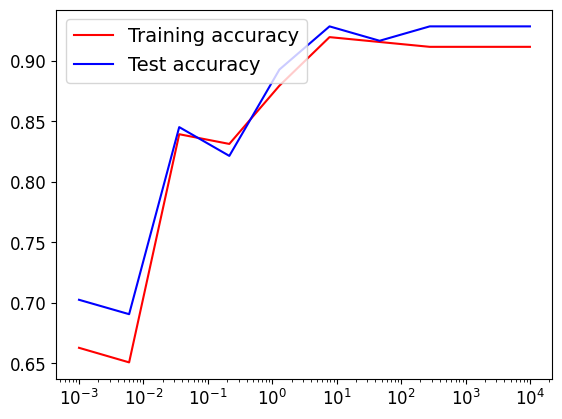

In [43]:
#Testing accuracy across different C values
c_vals = np.logspace(-3, 4, num=10, base=10)
regs = [LogisticRegression(solver="liblinear", penalty="l1", C=c, max_iter=300).fit(X_train, y_train) for c in c_vals]
train_accs = np.array([lg.score(X_train, y_train) for lg in regs])
test_accs = np.array([lg.score(X_test, y_test) for lg in regs])
plt.xscale("log")
plt.plot(c_vals, train_accs, "r-", label="Training accuracy")
plt.plot(c_vals, test_accs, "b-", label="Test accuracy")
plt.legend(loc="upper left", fontsize=14)
#Test accuracy plateaus around 85-90%

Although higher C values tend to improve the accuracy of logistic regression, the accuracy eventually plateaus around the 85-90% range, giving diminishing returns.

Next, we're going to try support vector machines.

In [13]:
#SVM
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from mglearn.plot_helpers import discrete_scatter
import mglearn  # Generates a deprecation warning
X_train, X_test, y_train, y_test = train_test_split(xx, yy)

from mpl_toolkits.mplot3d import Axes3D, axes3d
svc = SVC(degree = 100)
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.60
Accuracy on test set: 0.64


With default parameters, the accuracy is pretty bad :(

Let see if changing the C value can help improve the score.

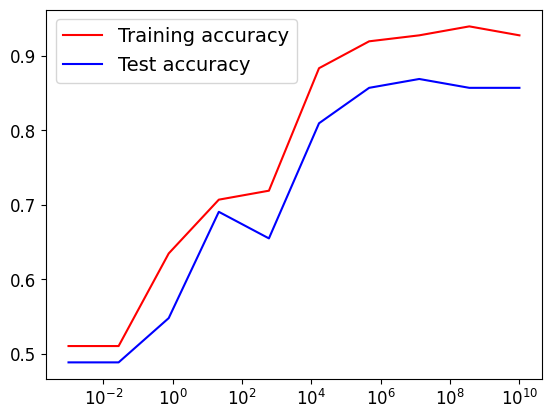

In [61]:
c_vals = np.logspace(-3, 10, num=10, base=10)
#c_vals = [1.]
X_train, X_test, y_train, y_test = train_test_split(xx, yy)
svcs = [SVC(C=c,degree=30).fit(X_train, y_train) for c in c_vals]
train_accs = np.array([lg.score(X_train, y_train) for lg in svcs])
test_accs = np.array([lg.score(X_test, y_test) for lg in svcs])
plt.xscale("log")
plt.plot(c_vals, train_accs, "r-", label="Training accuracy")
plt.plot(c_vals, test_accs, "b-", label="Test accuracy")
plt.legend(loc="upper left", fontsize=14)

It looks like the higher C values improves both the test and training accuracy, but going too high causes overfitting to happen. A C value between 10,000-100,000 seems to have the best results without too much overfitting.

In [63]:
from mpl_toolkits.mplot3d import Axes3D, axes3d
X_train, X_test, y_train, y_test = train_test_split(xx, yy)

svc = SVC(C=10000, degree = 10)
svc.fit(X_train, y_train)
print("C = 10000\nAccuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}\n".format(svc.score(X_test, y_test)))

svc = SVC(C=100000, degree = 10)
svc.fit(X_train, y_train)
print("C = 100000\nAccuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}\n".format(svc.score(X_test, y_test)))

svc = SVC(C=1000000, degree = 10)
svc.fit(X_train, y_train)
print("C = 1000000\nAccuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

C = 10000
Accuracy on training set: 0.85
Accuracy on test set: 0.85

C = 100000
Accuracy on training set: 0.89
Accuracy on test set: 0.90

C = 1000000
Accuracy on training set: 0.92
Accuracy on test set: 0.96


Finally, let's try using MLP.

In [66]:
import mglearn
from sklearn.neural_network import MLPClassifier
X_train, X_test, y_train, y_test = train_test_split(xx, yy)
mlp = MLPClassifier(hidden_layer_sizes=(10) )
mlp.fit(X_train, y_train)

print("Hidden Layers: 10")
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}\n".format(mlp.score(X_test, y_test)))

Hidden Layers: 10
Accuracy on training set: 0.50
Accuracy on test set: 0.51



It doesn't seem to be doing so well with only one layer, so let's see how adjusting the hidden layers changes our accuracy.

In [68]:
mlp = MLPClassifier(hidden_layer_sizes=(10,10) )
mlp.fit(X_train, y_train)

print("Hidden Layers: 10,10")
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}\n".format(mlp.score(X_test, y_test)))

mlp = MLPClassifier(hidden_layer_sizes=(10,10,10) )
mlp.fit(X_train, y_train)

print("Hidden Layers: 10,10,10")
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}\n".format(mlp.score(X_test, y_test)))

mlp = MLPClassifier(hidden_layer_sizes=(10,10,10,10) )
mlp.fit(X_train, y_train)

print("Hidden Layers: 10,10,10,10")
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}\n".format(mlp.score(X_test, y_test)))

mlp = MLPClassifier(hidden_layer_sizes=(100,100,100,100) )
mlp.fit(X_train, y_train)

print("Hidden Layers: 100,100,100,100")
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}\n".format(mlp.score(X_test, y_test)))

mlp = MLPClassifier(hidden_layer_sizes=(1000,1000,1000,1000) )
mlp.fit(X_train, y_train)
      
print("Hidden Layers: 1000,1000,1000,1000")
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}\n".format(mlp.score(X_test, y_test)))

Hidden Layers: 10,10
Accuracy on training set: 0.50
Accuracy on test set: 0.49

Hidden Layers: 10,10,10
Accuracy on training set: 0.50
Accuracy on test set: 0.49

Hidden Layers: 10,10,10,10
Accuracy on training set: 0.36
Accuracy on test set: 0.37

Hidden Layers: 100,100,100,100
Accuracy on training set: 0.50
Accuracy on test set: 0.51

Hidden Layers: 1000,1000,1000,1000
Accuracy on training set: 0.55
Accuracy on test set: 0.62



No matter how much processing power we throw at it, MLP does not classify very well on our dataset. The accuracies tend to hover around 50-60%, occasionally hopping up to 70% on a fluke.

At the very beginning of our project, we chose to cut out the "island" and "year" features of the dataset, believing that they would have very little effect on our results. What if we put them back in and compared to results?

In [70]:
#Data set that includes Island and Year. Does all the same transformations to the full data set
penguinBig = pd.read_csv("/homes/abigailspencer/penguin/penguinsBIG.csv")
penguinarrayBig = penguin.to_numpy()

xBig = penguinarray[:,:-1]
yBig = penguinarray[:,-1]

#Transformed species into numbers
#Adelie = 0
#Gentoo = 1
#Chinstrap = 2
xxBig = np.zeros_like(x)
xxBig[:,1:] = x[:,1:]
for i in range(len(penguinarray)):
    if(penguinarray[i][0] == "Gentoo"):
        xx[i][0] = 1
    elif(penguinarray[i][0] == "Chinstrap"):
        xx[i][0] = 2
yyBig = (yBig == 'male').astype(int)

male = (yBig == 'male')
maleX = xxBig[male]
maleY = yyBig[male]
female = (yBig == 'female')
femaleX = xxBig[female]
femaleY = yyBig[female]
print("Number of male penguins: ", len(maleX), "\nNumber of female penguins: ", len(femaleX))

Number of male penguins:  168 
Number of female penguins:  165


SVM seemed to be our best performing model, so let's compare SVM on our reduced dataset versus the set with the full eight features.

In [77]:
X_train, X_test, y_train, y_test = train_test_split(xx, yy)
svc = SVC(C=1000000, degree = 10)
svc.fit(X_train, y_train)
print("Accuracy on training set (reduced data): {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set (reduced data): {:.2f}\n".format(svc.score(X_test, y_test)))

X_train, X_test, y_train, y_test = train_test_split(xxBig, yyBig)
svc = SVC(C=1000000, degree = 10)
svc.fit(X_train, y_train)
print("Accuracy on training set (full data): {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set (full data): {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set (reduced data): 0.93
Accuracy on test set (reduced data): 0.89

Accuracy on training set (full data): 0.90
Accuracy on test set (full data): 0.89


At least in the case of SVMs, after running this cell multiple times, there doesn't seem to be a noticeable increase in accuracy after adding back these two features. Therefore, we will not be testing all of these models on the full dataset.